# fitslicesy
Illustrates how to use the TH1::FitSlicesY function
It uses the TH2F histogram generated in macro hsimple.C
It invokes FitSlicesY and draw the fitted "mean" and "sigma"
in 2 sepate pads.
This macro shows also how to annotate a picture, change
some pad parameters.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:03 AM.</small></i>

Change some default parameters in the current style

In [1]:
gStyle->SetLabelSize(0.06,"x");
gStyle->SetLabelSize(0.06,"y");
gStyle->SetFrameFillColor(38);
gStyle->SetTitleW(0.6);
gStyle->SetTitleH(0.1);

Connect the input file and get the 2-d histogram in memory

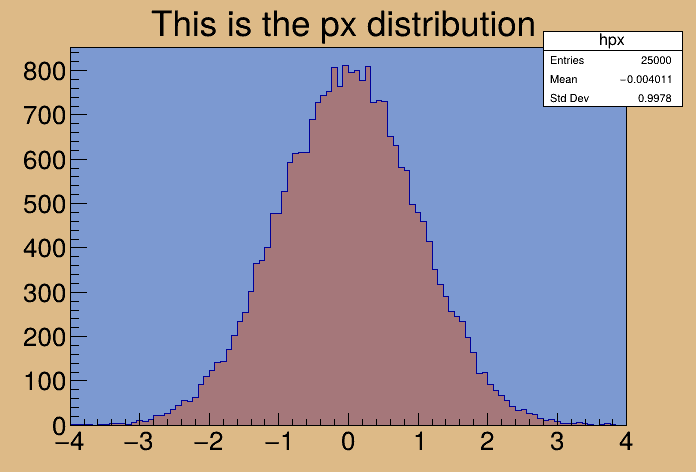

hsimple   : Real Time =   0.07 seconds Cpu Time =   0.07 seconds


In [2]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/hsimple.C");
dir.ReplaceAll("/./","/");
if (!gInterpreter->IsLoaded(dir.Data())) gInterpreter->LoadMacro(dir.Data());
TFile *hsimpleFile = (TFile*)gROOT->ProcessLineFast("hsimple(1)");
if (!hsimpleFile) return;
TH2F *hpxpy = (TH2F*)hsimpleFile->Get("hpxpy");

Create a canvas and divide it

In [3]:
TCanvas *c1 = new TCanvas("c1","c1",700,500);
c1->SetFillColor(42);
c1->Divide(2,1);
TPad *leftPad = (TPad*)c1->cd(1);;
leftPad->Divide(1,2);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Draw 2-d original histogram

In [4]:
leftPad->cd(1);
gPad->SetTopMargin(0.12);
gPad->SetFillColor(33);
hpxpy->Draw();
hpxpy->GetXaxis()->SetLabelSize(0.06);
hpxpy->GetYaxis()->SetLabelSize(0.06);
hpxpy->SetMarkerColor(kYellow);

Fit slices projected along Y fron bins in X [7,32] with more than 20 bins  in Y filled

In [5]:
hpxpy->FitSlicesY(nullptr,7,32,20);

Show fitted "mean" for each slice

In [6]:
leftPad->cd(2);
gPad->SetFillColor(33);
TH2F *hpxpy_0 = (TH2F*)hsimpleFile->Get("hpxpy_0");
hpxpy_0->Draw();
TPad *rightPad = (TPad*)c1->cd(2);
rightPad->Divide(1,2);
rightPad->cd(1);
gPad->SetTopMargin(0.12);
gPad->SetLeftMargin(0.15);
gPad->SetFillColor(33);
TH2F *hpxpy_1 = (TH2F*)hsimpleFile->Get("hpxpy_1");
hpxpy_1->Draw();

Show fitted "sigma" for each slice

In [7]:
rightPad->cd(2);
gPad->SetTopMargin(0.12);
gPad->SetLeftMargin(0.15);
gPad->SetFillColor(33);
TH2F *hpxpy_2 = (TH2F*)hsimpleFile->Get("hpxpy_2");
hpxpy_2->SetMinimum(0.8);
hpxpy_2->Draw();

attributes

In [8]:
hpxpy_0->SetLineColor(5);
hpxpy_1->SetLineColor(5);
hpxpy_2->SetLineColor(5);
hpxpy_0->SetMarkerColor(2);
hpxpy_1->SetMarkerColor(2);
hpxpy_2->SetMarkerColor(2);
hpxpy_0->SetMarkerStyle(21);
hpxpy_1->SetMarkerStyle(21);
hpxpy_2->SetMarkerStyle(21);
hpxpy_0->SetMarkerSize(0.6);
hpxpy_1->SetMarkerSize(0.6);
hpxpy_2->SetMarkerSize(0.6);

Draw all canvases 

In [9]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()